## "Write a program to find the ground state of LJ potential for N=3 "
$$ V = 4\epsilon \big[ \big(\frac{\delta}{r}\big)^{12} - \big(\frac{\delta}{r}\big)^{6} \big]$$

where $\epsilon$ is the depth of the potential well and $\sigma$ is the distance at which the potential crosses zero, while $r$ is the distance between two atoms.

In [16]:
import numpy as np
def Lj(r):
   
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

To find how many interatomic interaction there will exist with N=3, We choose 2 from 3 and get a total of 3 interactions, therefore, ideally, we have 3 of the Leonard-Jones potential interactions. So we now create a function where the total Leonard-Jones interactions will be calculated by adding the individual interactions:

In [17]:
def LjTotal(positions):
    Energy=0
    N_atom = int(len(positions)/3)

    for i in range(N_atom - 1):
        for j in range(i + 1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1 - pos2)
            Energy = Energy + Lj(dist)
            
    return Energy

Now we create a Random XYZ list of all potential coordinates for our configuration of atoms within a cube of length L

In [24]:
def init_pos(N, L=1):
    return L*np.random.random_sample((N*3,))

Now we test our code for N=3

In [37]:
N=3
pos = init_pos(N)
print('This is based on a random coordinate & and will vary upon reruning code')
print("For", N,"atoms, the total Leonard-jones potential is:",LjTotal(pos))

This is based on a random coordinate & and will vary upon reruning code
For 3 atoms, the total Leonard-jones potential is: 4896.877599281126


If we rerun the code multiple times, we get different energy state but we want the GROUND STATE which correlates to the minimum of our TOTAL Leonard-Jones potential. So now we minimize the function using the scipy library:

In [38]:
from scipy.optimize import minimize

res = minimize(LjTotal, pos, method='CG', tol=1e-4)
print("Minimizing the Leonard-Jones potential gives a ground energy of: ", res.fun)

Minimizing the Leonard-Jones potential gives a ground energy of:  -2.9999999999832134


Using the Cambridge cluster database, we see that for N=3, they have a ground state defined as -3.000

## "Try different minimization methods in scipy on larger systems ($N$ up to 20)"

lets try our code again from a random coordinate, now for N=20

In [46]:
N=15
pos = init_pos(N)
print('This is based on a random coordinate & and will vary upon reruning code')
print("For", N,"atoms, the total Leonard-jones potential is:",LjTotal(pos))

This is based on a random coordinate & and will vary upon reruning code
For 15 atoms, the total Leonard-jones potential is: 40288.951738208416


Let us minimize the funtion now for (N=20)

In [47]:
N=15
pos = init_pos(N)
res = minimize(LjTotal, pos, method='CG', tol=1e-4)
print("Minimizing the Leonard-Jones potential gives a ground energy of: ", res.fun)

Minimizing the Leonard-Jones potential gives a ground energy of:  -50.874764531493625


Using the Cambridge cluster database, we see that for N=15, they have a ground state defined as 
-52.322627 so it is likely that the minimizing function is going towards a basin.

A work around this problem to run this test multiple times with different random start points, thereafter, compare each result multiple times tot find the global minimum rather than a local Min:

In [49]:
import time

f_values = []
x_values = []
N_attempts = 30

t0 = time.perf_counter() # time start
for i in range(N_attempts):
    pos = init_pos(N)
    res = minimize(LjTotal, pos, method='CG', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    print('\rRUN {:d} OUT OF {:d}: Total Energy = {:.4f}'.format(i, N_attempts, res.fun), flush=True, end='')
t1 = time.perf_counter() # time end
time = t1 - t0
    
print('Ground state energy:', min(f_values))
print("Total calculation time: {:.0f} sec".format(time, ))

RUN 29 OUT OF 30: Total Energy = -39.7171Ground state energy: -51.37264608392404
Total calculation time: 477 sec


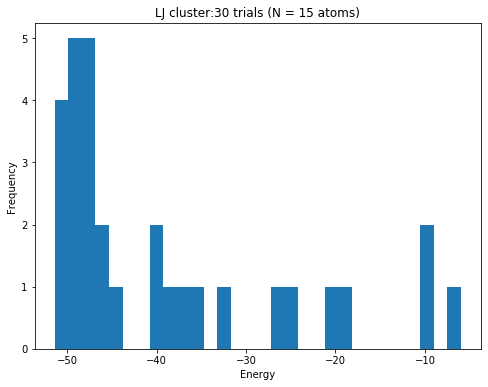

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.title('LJ cluster:'+ str(N_attempts)+ ' trials (N = ' + str(N)+' atoms)')
plt.hist(f_values, N_attempts)
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()